In [14]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import linregress
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import zscore
from scipy.stats import kendalltau
verdict_df = pd.read_csv("Outputs/Outpatient_State_Imaging_Efficiency.csv")
readmission_perfomance_of_state = pd.read_csv('Outputs/readmission_perfomance_of_state.csv')
healthcare_infections_pd = pd.read_csv("Outputs/Healthcare_Associated_Infections-State-clean.csv")
healthcare_spending_pd = pd.read_csv("Outputs/Medicare_Hospital_Spending_Per_Patient-State-clean.csv")
spending_per_patient = pd.read_csv('Outputs/Medicare_Hospital_Spending_Per_Patient-State-clean.csv')
infections_mean = pd.read_csv("Outputs/Healthcare_Associated_Infections-State-clean.csv")


In [16]:
# merge the dataframes
merge_df = pd.merge(verdict_df, readmission_perfomance_of_state, on="State")
merge_df = pd.merge(merge_df, healthcare_infections_pd, on="State")
merge_df = pd.merge(merge_df, healthcare_spending_pd, on="State")
merge_df = pd.merge(merge_df, spending_per_patient_state, on="State")
merge_df = pd.merge(merge_df, infections_mean, on="State")

#delete the columns that are not needed
del merge_df['SIR Average_x']
del merge_df['Score_x']

#rename the columns
merge_df = merge_df.rename(columns={"SIR Average_y": "SIR Average", "Score_y": "Score"})

merge_df.head()

,State,Average State Score,Average National Score,Verdict,Number of Hospitals Worse,Number of Hospitals Same,Number of Hospitals Better,Number of Hospitals Too Few,Total Hospitals,% Outstanding Hospitals,% Under Performing,% Average Performance,Score,SIR Average
0,AK,14.900,14.025,Inefficient,0.0,61.0,1.0,46.0,108.0,0.93,0.00,56.48,0.92,0.901000
1,AL,15.150,14.025,Inefficient,1.0,347.0,0.0,137.0,485.0,0.00,0.21,71.55,0.96,0.907000
2,AR,14.700,14.025,Inefficient,4.0,283.0,3.0,122.0,412.0,0.73,0.97,68.69,1.00,0.799333
3,AZ,13.175,14.025,Efficient,5.0,319.0,9.0,122.0,455.0,1.98,1.10,70.11,0.94,0.729500
4,CA,14.375,14.025,Inefficient,31.0,1397.0,16.0,521.0,1965.0,0.81,1.58,71.09,1.00,0.804667


In [31]:
# Finding the top performing hospitals based on the readmission rate
top_performing_hospitals = merge_df.sort_values('% Outstanding Hospitals', ascending=False)
top_performing_hospitals.head(10)

,State,Average State Score,Average National Score,Verdict,Number of Hospitals Worse,Number of Hospitals Same,Number of Hospitals Better,Number of Hospitals Too Few,Total Hospitals,% Outstanding Hospitals,% Under Performing,% Average Performance,Score,SIR Average
11,HI,11.575,14.025,Efficient,0.0,50.0,5.0,36.0,91.0,5.49,0.00,54.95,0.93,0.599833
13,ID,13.850,14.025,Efficient,0.0,123.0,9.0,101.0,233.0,3.86,0.00,52.79,0.97,0.971833
46,WA,13.025,14.025,Efficient,1.0,318.0,19.0,165.0,503.0,3.78,0.20,63.22,0.92,0.851667
20,ME,13.375,14.025,Efficient,1.0,121.0,7.0,70.0,199.0,3.52,0.50,60.80,0.93,0.836833
43,UT,14.800,14.025,Inefficient,0.0,147.0,9.0,101.0,257.0,3.50,0.00,57.20,0.94,0.729000
8,DE,11.150,14.025,Efficient,0.0,41.0,1.0,2.0,44.0,2.27,0.00,93.18,1.02,0.716000
40,SD,12.300,14.025,Efficient,1.0,119.0,6.0,164.0,290.0,2.07,0.34,41.03,0.93,0.872000
26,NC,12.750,14.025,Efficient,6.0,494.0,13.0,119.0,632.0,2.06,0.95,78.16,0.95,0.872500
36,OR,14.675,14.025,Inefficient,0.0,232.0,7.0,109.0,348.0,2.01,0.00,66.67,0.89,0.793500
44,VA,12.675,14.025,Efficient,4.0,408.0,10.0,79.0,501.0,2.00,0.80,81.44,0.96,0.729667


In [32]:
# Finding the under performing hospitals based on the readmission rate
under_performing_hospitals = merge_df.sort_values('% Under Performing', ascending=False)
under_performing_hospitals.head(10)

,State,Average State Score,Average National Score,Verdict,Number of Hospitals Worse,Number of Hospitals Same,Number of Hospitals Better,Number of Hospitals Too Few,Total Hospitals,% Outstanding Hospitals,% Under Performing,% Average Performance,Score,SIR Average
19,MA,12.975,14.025,Efficient,30.0,284.0,2.0,40.0,356.0,0.56,8.43,79.78,0.98,0.786333
30,NJ,15.725,14.025,Inefficient,22.0,330.0,7.0,43.0,402.0,1.74,5.47,82.09,1.07,0.808667
9,FL,14.450,14.025,Inefficient,48.0,946.0,13.0,160.0,1167.0,1.11,4.11,81.06,1.01,0.708500
38,RI,13.575,14.025,Efficient,2.0,50.0,0.0,9.0,61.0,0.00,3.28,81.97,0.99,0.644333
33,NY,19.075,14.025,Inefficient,29.0,743.0,9.0,200.0,981.0,0.92,2.96,75.74,1.02,0.822833
7,DC,12.550,14.025,Efficient,1.0,39.0,0.0,3.0,43.0,0.00,2.33,90.70,1.02,0.957000
14,IL,14.350,14.025,Inefficient,23.0,775.0,2.0,260.0,1060.0,0.19,2.17,73.11,1.00,0.777833
32,NV,13.825,14.025,Efficient,4.0,157.0,2.0,50.0,213.0,0.94,1.88,73.71,1.03,0.770500
21,MI,13.700,14.025,Efficient,13.0,539.0,12.0,190.0,754.0,1.59,1.72,71.49,0.94,0.965000
48,WV,14.425,14.025,Inefficient,5.0,183.0,0.0,105.0,293.0,0.00,1.71,62.46,0.99,1.045333


In [34]:
# Sort new Dataframe by Average State Score in ascending order
most_efficient = verdict_df.sort_values(by="Average State Score", ascending=True)

# Remove States without Data
most_efficient = most_efficient.loc[most_efficient["Average State Score"]>0.0]
most_efficient.head()

,State,Average State Score,Average National Score,Verdict
9,DE,11.150,14.025,Efficient
13,HI,11.575,14.025,Efficient
14,IA,12.175,14.025,Efficient
51,VT,12.250,14.025,Efficient
45,SD,12.300,14.025,Efficient


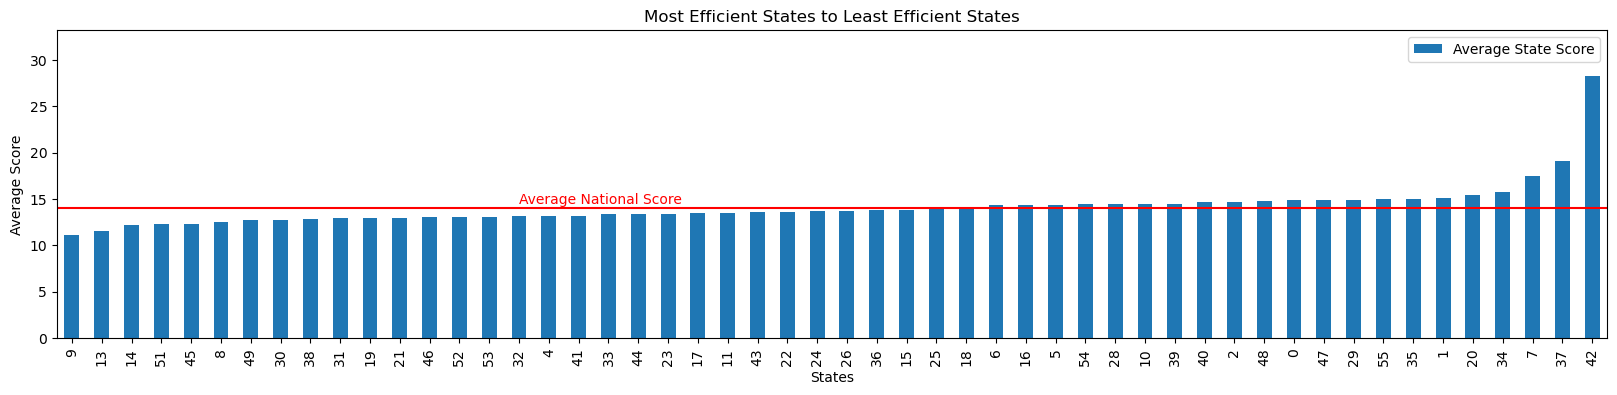

In [35]:
# Plot BarChart showing the most efficient state to least efficent states (left to right)
most_efficient_plot = most_efficient["Average State Score"].plot(kind="bar", figsize=(20,4), ylabel="Average Score", xlabel="States")
plt.hlines(y=14.025, xmin=-1, xmax=51.5, colors="red")
plt.text(15, 14.5, "Average National Score", color="red")
plt.legend(loc="best")
plt.title("Most Efficient States to Least Efficient States")
plt.ylim(0, max(most_efficient["Average State Score"]+5))
plt.savefig("Visualizations/Most_Efficient_States.png")
plt.show()


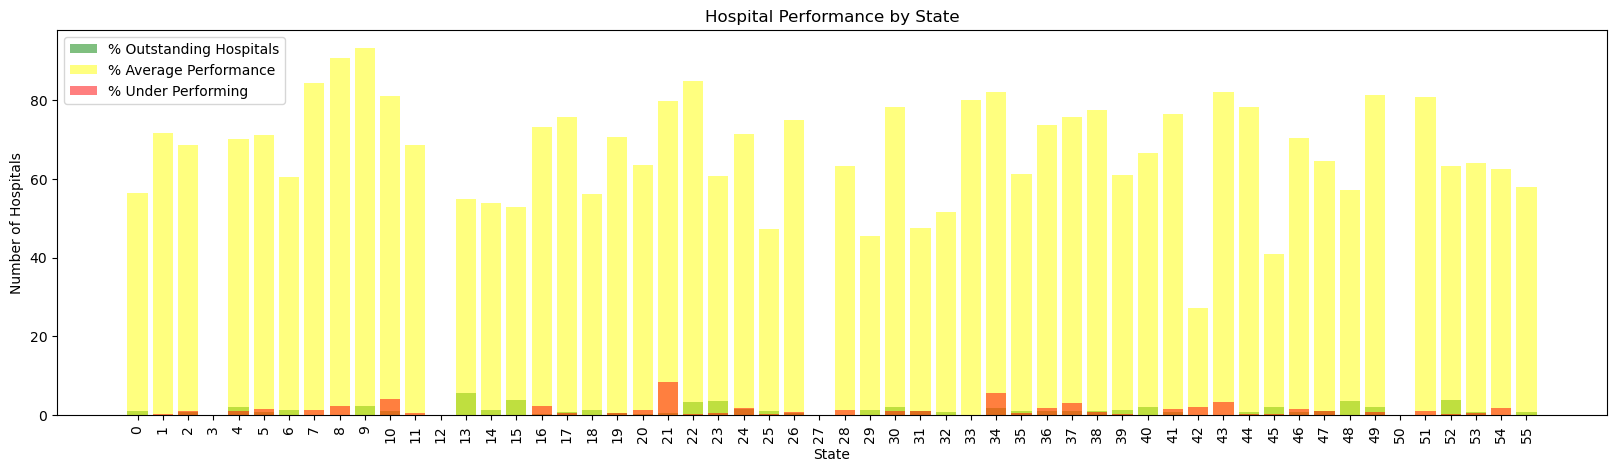

In [27]:
# Plot a bar graph to show the performance of hospitals in each state side by side with the national average
fig, ax = plt.subplots(figsize=(20,5))
x_axis = np.arange(len(states))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation=90)
plt.bar(x_axis, readmission_perfomance_of_state['% Outstanding Hospitals'], color='green', alpha=0.5, align="center")
plt.bar(x_axis, readmission_perfomance_of_state['% Average Performance'], color='yellow', alpha=0.5, align="center")
plt.bar(x_axis, readmission_perfomance_of_state['% Under Performing'], color='red', alpha=0.5, align="center")
plt.legend(['% Outstanding Hospitals', '% Average Performance', '% Under Performing'], loc='best')
plt.title('Hospital Performance by State')
plt.ylabel('Number of Hospitals')
plt.xlabel('State')
plt.savefig('Visualizations/Hospital_Performance_by_State.png')
plt.show()



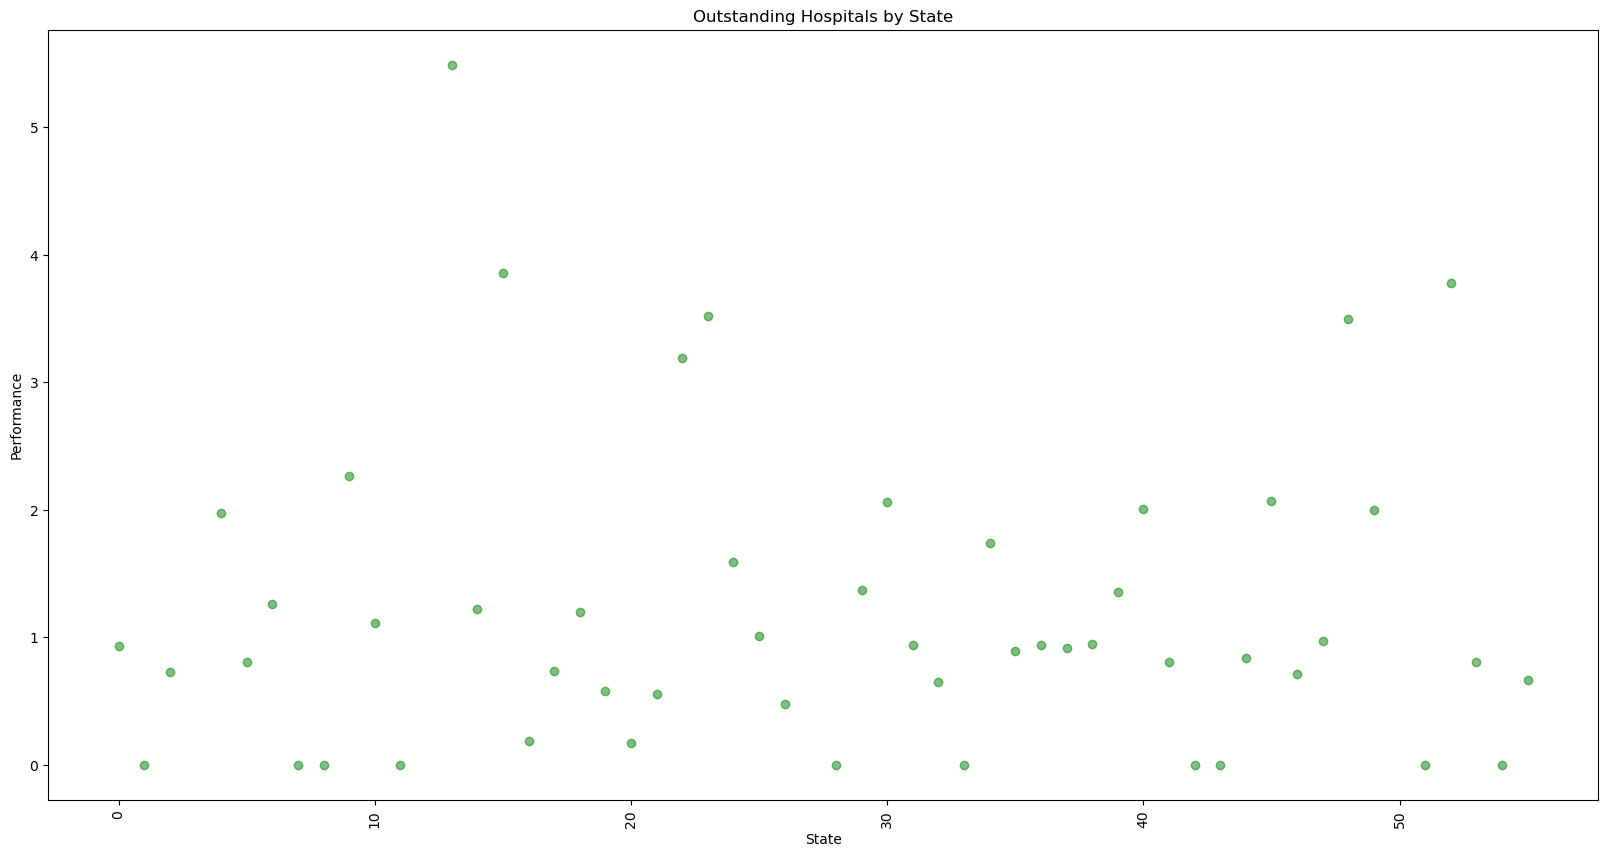

In [30]:
#Plot scatter plot to show Outstanding hospitals vs State
plt.figure(figsize=(20,10))
plt.scatter(top_performing_hospitals.index, top_performing_hospitals['% Outstanding Hospitals'], color='green', alpha=0.5)
plt.xticks(rotation=90)
plt.title("Outstanding Hospitals by State")
plt.xlabel("State")
plt.ylabel("Performance")
plt.savefig("Visualizations/Outstanding_Hospitals_by_State.png")
plt.show()

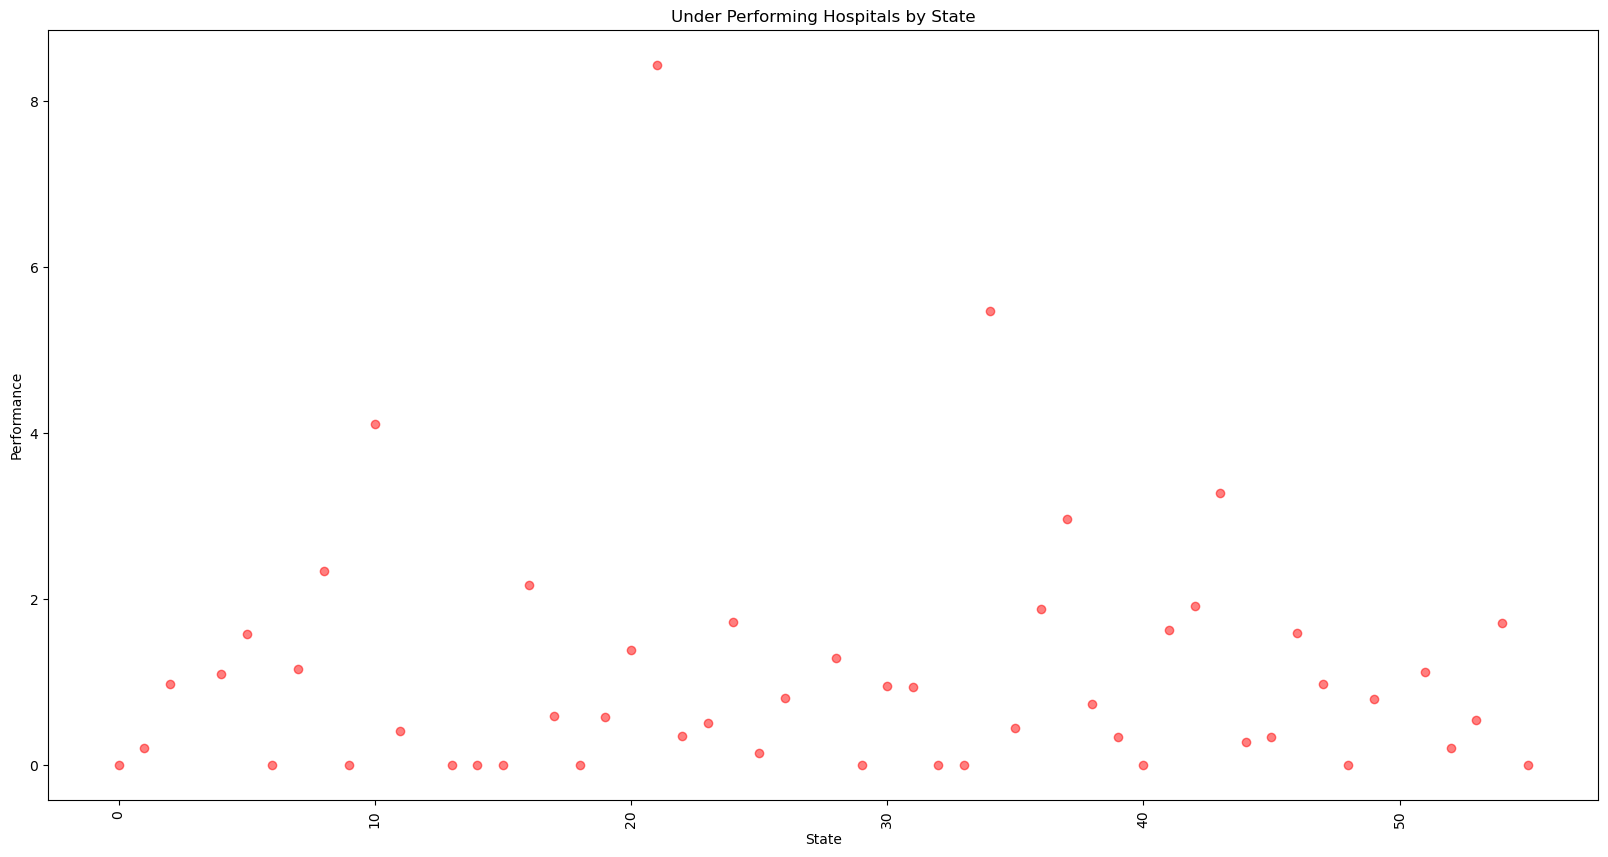

In [29]:
#Plot scatter plot to show Under Performing hospitals vs State
plt.figure(figsize=(20,10))
plt.scatter(under_performing_hospitals.index, under_performing_hospitals['% Under Performing'], color='red', alpha=0.5)
plt.xticks(rotation=90)
plt.title("Under Performing Hospitals by State")
plt.xlabel("State")
plt.ylabel("Performance")
plt.savefig("Visualizations/Under_Performing_Hospitals_by_State.png")
plt.show()

In [10]:
# Drop the columns that are not needed and keep state and score
spending_per_patient_state = spending_per_patient[['State', 'Score']]

# Convert the score column to a numeric value
spending_per_patient_state['Score'] = pd.to_numeric(spending_per_patient_state['Score'], errors='coerce')

# Convert NaN values to 0
spending_per_patient_state = spending_per_patient_state.fillna(0)
spending_per_patient_state.head()


,State,Score
0,AK,0.92
1,AL,0.96
2,AR,1.00
3,AZ,0.94
4,CA,1.00


<Axes: title={'center': 'Medicare Hospital Spending per Patient - State'}, xlabel='State', ylabel='Score'>

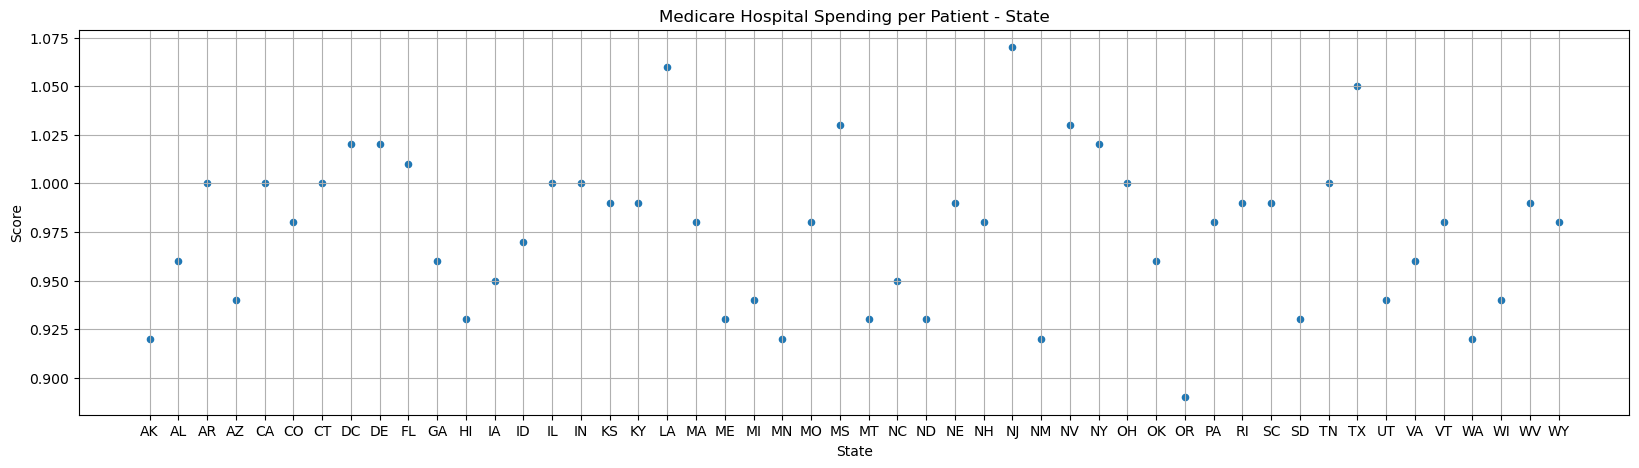

In [11]:
# Filter out states with 0 scores
spending_per_patient_state = spending_per_patient_state.loc[spending_per_patient_state['Score'] != 0]

# Create a scatterplot of the data using the index as the x-axis and the score as the y-axis
spending_per_patient_state.plot(kind='scatter', x='State', y='Score', figsize=(20,5), grid=True, title='Medicare Hospital Spending per Patient - State')

In [36]:
# Find the mean, median, and mode of the score
mean = spending_per_patient_state['Score'].mean()
median = spending_per_patient_state['Score'].median()
mode = spending_per_patient_state['Score'].mode()
print(f'The mean is {mean}')
print(f'The median is {median}')
print(f'The mode is {mode}')

The mean is 0.976
The median is 0.98
The mode is 0    0.98
1    1.00
Name: Score, dtype: float64


Text(0, 0.5, 'Spending per Patient')

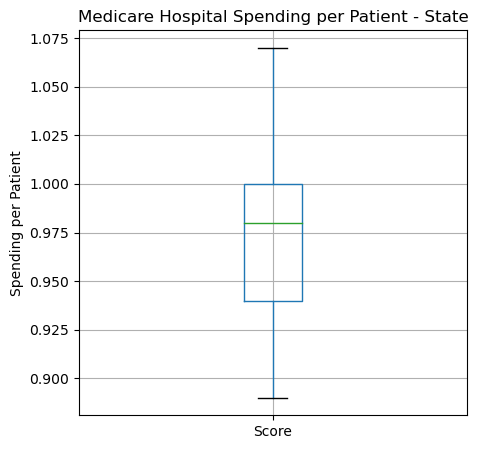

In [37]:
# Create a boxplot to find outliers
spending_per_patient_state.boxplot(column=['Score'], figsize=(5,5))

# Add title and labels to the boxplot
plt.title('Medicare Hospital Spending per Patient - State')
plt.ylabel('Spending per Patient')


<Axes: >

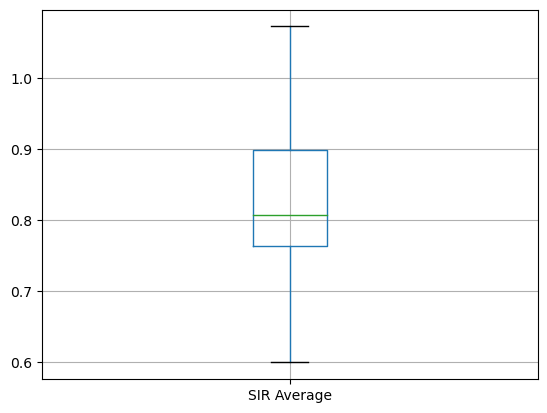

In [38]:
#Create a boxplot to find outliers for infections
infections_mean.boxplot(column='SIR Average')